In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Better way to loop through files

In [63]:
def extract_data(sim_file, n_files=100, shift=False):
    eff_total_mix = {}
    eff_total_events = {}
    n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

    for i in n_systems:
        eff_single_mix = []
        eff_single_event = []
        for j in range(1, n_files+1):
            eff_df = pd.read_csv(f"../../data/{sim_file}/{str(i)}/ecmc_ff_sf_10m-{str(i)}-{str(j)}.csv")

            if shift:
                eff_df["events"] = eff_df['events'].shift(1)
                eff_df["events"][0] = 0
                
            eff_single_mix.append(eff_df["var_mix"].to_list())
            eff_single_event.append(eff_df["events"].to_list())
        eff_single_mix = np.mean(eff_single_mix, axis=0)
        eff_single_event = np.mean(eff_single_event, axis=0)

        eff_total_mix[i] = eff_single_mix
        eff_total_events[i] = eff_single_event
    
    return eff_total_mix, eff_total_events

def create_baseline(events):
    x_baseline = {}
    for i in n_systems:
        x_baseline[i] = np.cumsum(events[i])/i

    return x_baseline

def calculate_var_equil(n_particles):

    diameter = 400/(2*n_particles)
    L_free = (400 - n_particles * diameter)

    return  (n_particles**2*(L_free/n_particles)**2)/(4 * (n_particles+1))
var_equil_8 = calculate_var_equil(8)
var_equil_16 = calculate_var_equil(16)
var_equil_32 = calculate_var_equil(32)
var_equil_64 = calculate_var_equil(64)
var_equil_128 = calculate_var_equil(128)
var_equil_256 = calculate_var_equil(256)
var_equil_512 = calculate_var_equil(512)
var_equil_1024 = calculate_var_equil(1024)
var_equil_2048 = calculate_var_equil(2048)


### MEANIFIED system sizes 

#### Classical FF

In [60]:
n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

eff_baseline_mix, eff_baseline_events = extract_data("var_runs_400", n_files=500, shift=True)

eff_x_baseline = create_baseline(eff_baseline_events)



#### Accelerated FF

In [64]:
n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

eff_acc_mix, eff_acc_events = extract_data("acc_runs", shift=True)

eff_acc_x_baseline = create_baseline(eff_acc_events)


#### Accelerated FF 1 sweep h_i

In [66]:
n_systems = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

eff_acc_1s_mix, eff_acc_1s_events = extract_data("acc_runs_2nh_nl4s")

eff_acc_1s_x_baseline = create_baseline(eff_acc_1s_events)


#### Mixing time plots

(0.0, 2.0)

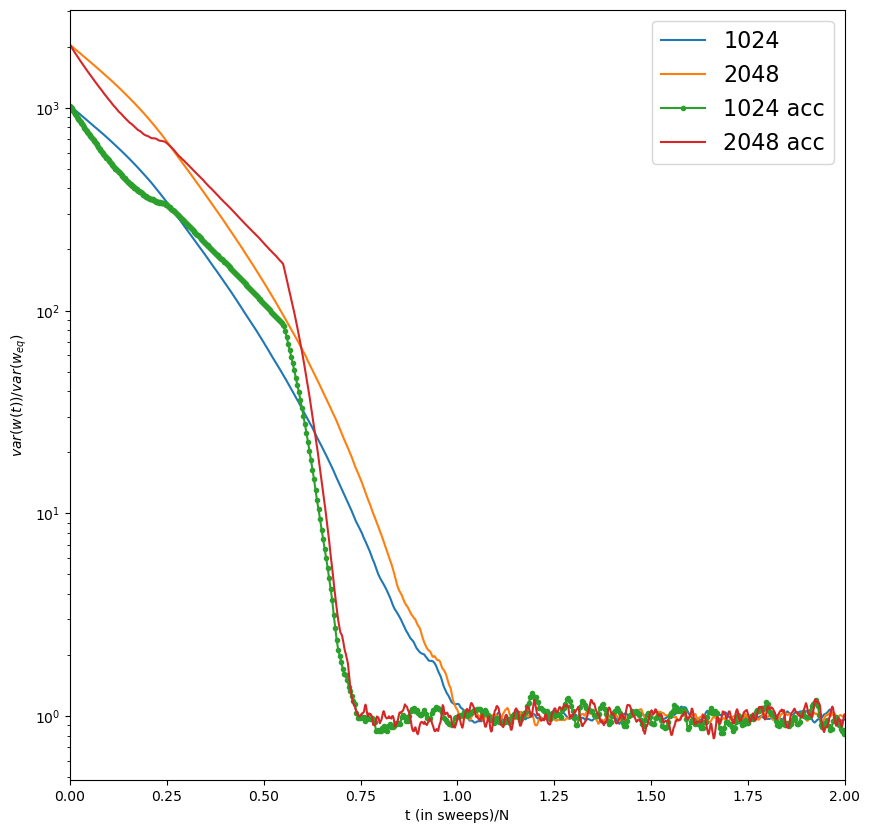

In [68]:
fig, ax = plt.subplots(1, figsize=(10, 10))

# ax.plot(eff_x_baseline[8][:1000]/8, (eff_baseline_mix[8][:1000]/var_equil_8), label="8")
# ax.plot(eff_x_baseline[16][:2000]/16, ((eff_baseline_mix[16])[:2000]/var_equil_16), label="16")
# ax.plot(eff_x_baseline[32][:2000]/32, ((eff_baseline_mix[32])[:2000]/var_equil_32), label="32")
# ax.plot(eff_x_baseline[64][:2000]/64, (eff_baseline_mix[64][:2000]/var_equil_64), label="64")
# ax.plot(eff_x_baseline[128][:10000]/128, (eff_baseline_mix[128][:10000]/var_equil_128), label="128")
# ax.plot(eff_x_baseline[256][:5000]/256, (eff_baseline_mix[256][:5000]/var_equil_256), label="256")
# ax.plot(eff_x_baseline[512][:10000]/512, (eff_baseline_mix[512][:10000]/var_equil_512), label="512")
ax.plot(eff_x_baseline[1024][:30000]/1024, (eff_baseline_mix[1024][:30000]/var_equil_1024), label="1024")
ax.plot(eff_x_baseline[2048][:30000]/2048, (eff_baseline_mix[2048][:30000]/var_equil_2048), label="2048")

# ax.plot(eff_acc_x_baseline[8][:1000]/8, (eff_acc_mix[8][:1000]/var_equil_8), label="8 acc")
# ax.plot(eff_acc_x_baseline[16][:2000]/16, (eff_acc_mix[16][:2000]/var_equil_16), label="16 acc")
# ax.plot(eff_acc_x_baseline[32][:2000]/32, (eff_acc_mix[32][:2000]/var_equil_32), label="32 acc")
# ax.plot(eff_acc_x_baseline[64][:2000]/64, (eff_acc_mix[64][:2000]/var_equil_64), label="64 acc")
# ax.plot(eff_acc_x_baseline[128][:10000]/128, (eff_acc_mix[128][:10000]/var_equil_128), label="128 acc")
# ax.plot(eff_acc_x_baseline[256][:5000]/256, (eff_acc_mix[256][:5000]/var_equil_256), label="256 acc")
# ax.plot(eff_acc_x_baseline[512][:10000]/512, (eff_acc_mix[512][:10000]/var_equil_512), label="512 acc")
# ax.plot(eff_acc_x_baseline[1024][:30000]/1024, (eff_acc_mix[1024][:30000]/var_equil_1024), label="1024 acc", marker=".")
# ax.plot(eff_acc_x_baseline[2048][:30000]/2048, (eff_acc_mix[2048][:30000]/var_equil_2048), label="2048 acc")

# ax.plot(eff_acc_1s_x_baseline[8][:1000]/8, (eff_acc_1s_mix[8][:1000]/var_equil_8), label="8 acc 1s")
# ax.plot(eff_acc_1s_x_baseline[16][:2000]/16, (eff_acc_1s_mix[16][:2000]/var_equil_16), label="16 acc 1s")
# ax.plot(eff_acc_1s_x_baseline[32][:2000]/32, (eff_acc_1s_mix[32][:2000]/var_equil_32), label="32 acc 1s")
# ax.plot(eff_acc_1s_x_baseline[64][:2000]/64, (eff_acc_1s_mix[64][:2000]/var_equil_64), label="64 acc 1s")
# ax.plot(eff_acc_1s_x_baseline[128][:10000]/128, (eff_acc_1s_mix[128][:10000]/var_equil_128), label="128 acc 1s")
# ax.plot(eff_acc_1s_x_baseline[256][:5000]/256, (eff_acc_1s_mix[256][:5000]/var_equil_256), label="256 acc 1s")
# ax.plot(eff_acc_1s_x_baseline[512][:10000]/512, (eff_acc_1s_mix[512][:10000]/var_equil_512), label="512 acc 1s")
ax.plot(eff_acc_1s_x_baseline[1024][:30000]/1024, (eff_acc_1s_mix[1024][:30000]/var_equil_1024), label="1024 acc", marker=".")
ax.plot(eff_acc_1s_x_baseline[2048][:30000]/2048, (eff_acc_1s_mix[2048][:30000]/var_equil_2048), label="2048 acc")

ax.set_ylabel("$var(w(t))/var(w_{eq})$")
ax.set_xlabel("t (in sweeps)/N")
ax.legend(fontsize="16")
ax.set_yscale('log')
ax.set_xlim(0, 2)


In [43]:
for idx, var in enumerate(eff_1024_acc_1s[:30000]):
    if var/var_equil_1024 > 1 * 0.9 and var/var_equil_1024 < 1.10:
        print(x_1024_acc_1s[idx]/1024)
        break

0.7354653072357176
